###### 1 - DATA CLEANING

Clean the dataset by removing missing values and outliers

In [1]:
#Import libraries
import pandas as pd
import numpy as np

In [2]:
#Load the Dataset
df = pd.read_csv('C:/Users/joane.JOANNAELIZABETH/Downloads/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print("Shape of the dataset:",df.shape)
print("Size of the dataset:",df.size)
print("Columns:",df.columns)

Shape of the dataset: (891, 12)
Size of the dataset: 10692
Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Check for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Forward-fill (replace null values with the previous non-null value)
data_forward_filled = df.ffill()

# Backward-fill (replace null values with the next non-null value)
data_backward_filled = df.bfill()

print("Forward Fill:",data_forward_filled)

print("Backward Fill:",data_backward_filled)

Forward Fill:      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ... 

In [16]:
# Replace null values with the mean of each column
data_filled = df.fillna(df.mean())

data_filled

C:\Users\joane.JOANNAELIZABETH\AppData\Local\Temp\ipykernel_12208\3847011011.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled = df.fillna(df.mean())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C50,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Handling Outliers:
To handle outliers for the entire dataset, you can use the Interquartile Range (IQR) method on all columns or specify columns of interest:

In [19]:
# Define a function to handle outliers using IQR
def handle_outliers_iqr(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe >= lower_bound) & (dataframe <= upper_bound)]

# Apply the function to the entire dataset
data_no_outliers = handle_outliers_iqr(data_filled)

# Now, data_no_outliers contains the dataset with outliers removed

# You can save the cleaned dataset to a new CSV file if needed
data_no_outliers.to_csv('cleaned_dataset.csv', index=False)


C:\Users\joane.JOANNAELIZABETH\AppData\Local\Temp\ipykernel_12208\1838958507.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataframe.quantile(0.25)
C:\Users\joane.JOANNAELIZABETH\AppData\Local\Temp\ipykernel_12208\1838958507.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dataframe.quantile(0.75)
C:\Users\joane.JOANNAELIZABETH\AppData\Local\Temp\ipykernel_12208\1838958507.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  return dataframe[(datafram

In [ ]:
df.to_csv('cleaned_dataset.csv', index=False)


###### 2 - SUMMARY STATISTICS

Calculate summary statistics (mean, median,mode, standard deviation) for a dataset

In [22]:
# Calculate the mean
mean = data_filled.mean()

# Calculate the median
median = data_filled.median()

# Calculate the mode
mode = data_filled.mode().values[0]  # There can be multiple modes, so we take the first one

# Calculate the standard deviation
std_dev = data_filled.std()

# Print the summary statistics
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std_dev}")


Mean: PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.581560
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64
Median: PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64
Mode: [1 0.0 3.0 'Abbing, Mr. Anthony' 'male' 24.0 0.0 0.0 '1601' 8.05 'G6' 'S']
Standard Deviation: PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.554590
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64


C:\Users\joane.JOANNAELIZABETH\AppData\Local\Temp\ipykernel_12208\2630371009.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = data_filled.mean()
C:\Users\joane.JOANNAELIZABETH\AppData\Local\Temp\ipykernel_12208\2630371009.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = data_filled.median()
C:\Users\joane.JOANNAELIZABETH\AppData\Local\Temp\ipykernel_12208\2630371009.py:11: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addit

###### 3 - Visualization using Histogram

Create a histogram or bar chart to visualize the distribution of data in a dataset

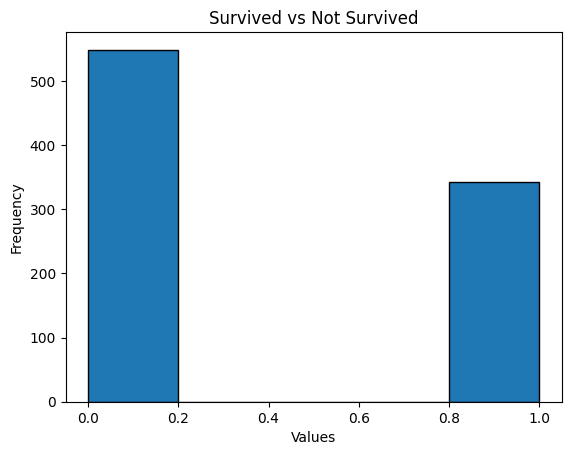

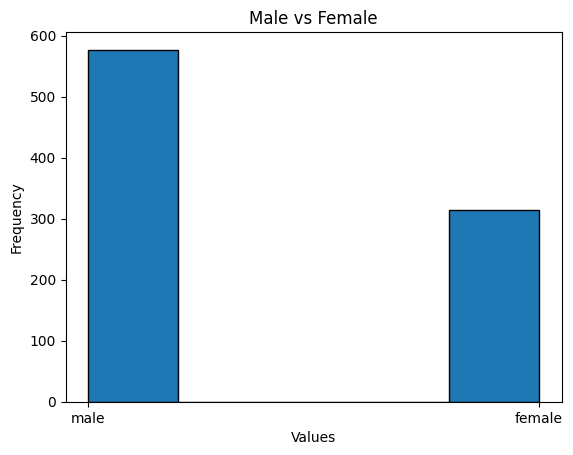

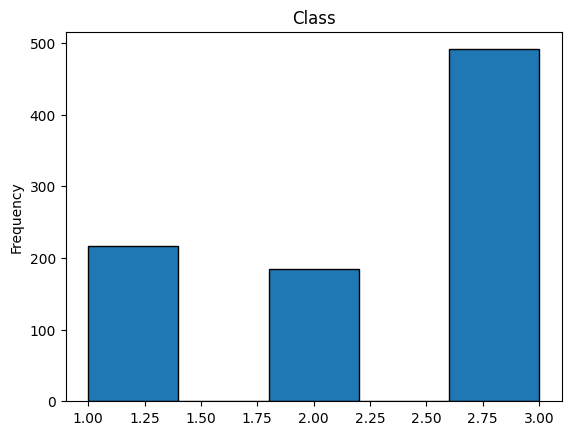

In [33]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(data_filled["Survived"], bins=5, edgecolor='k')  # Adjust the number of bins as needed
plt.title("Survived vs Not Survived")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

# Create a histogram
plt.hist(data_filled["Sex"], bins=5, edgecolor='k')  # Adjust the number of bins as needed
plt.title("Male vs Female")
plt.xlabel("Gender")
plt.ylabel("Number")
plt.show()

# Create a histogram
plt.hist(data_filled["Pclass"], bins=5, edgecolor='k')  # Adjust the number of bins as needed
plt.title("Class")
plt.ylabel("Frequency")
plt.show()

###### 5 - REMOVE DUPLICATE

Identify and remove duplicate values in the dataset

In [35]:
# Identify duplicate rows
duplicates = data_filled[data_filled.duplicated(keep='first')]  # keep='first' marks all duplicates except the first occurrence

# Remove duplicate rows
data_no_duplicates = data_filled.drop_duplicates(keep='first')

# Print the DataFrame without duplicates
print("Dataset with Duplicates Removed:")
print(data_no_duplicates)

# Print the duplicate rows
print("\nDuplicate Rows:")
print(duplicates)

Dataset with Duplicates Removed:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                  